# Regresión Lineal

## 1. Introducción
La Regresión Lineal es una de las herramientas fundamentales del análisis estadístico y econométrico que se utiliza en la actualidad. Este modelo permite relacionar de manera lineal una variable dependiente (Y) con un conjunto de variables explicativas (X), con el objetivo de predecir el valor promedio de la variable dependiente Y a partir de valores conocidos de X (Gujarati, D., & Porter, D., 1999).

A lo largo de este documento se presentará formalmente el modelo de regresión lineal, y se ilustrará su aplicación con un conjunto de datos real.

Este notebook está organizado de la siguiente forma: la segunda sección presentará una breve historia del modelo de regresión lineal como modelo predictivo, seguido de una presentación formal del modelo en la tercera sección. La cuarta sección realizará una aplicación de la regresión a un conjunto de datos de precios de vivienda y la quinta sección concluye.

## 2. Historia de la Regresión Lineal

# 3. Planteamiento del Modelo

Hasta este momento se ha mencionado que el modelo de regresión lineal permite encontrar la relación lineal entre una variable dependiente ($Y$) y una variable o un conjunto de variables explicativas ($X$). En esta sección se discutirá la forma funcional del modelo, su estimación y su utilización como modelo de predicción. 

Para comenzar, asuma que un modelador tiene una variable de interés $y_i$ que es medida para N individuos de una población, de forma que $i = 1, 2, \dots, N$. Adicional a este, el modelador cuenta con información adicional  de los individuos, $x_i$, que está relacionada con la variable de interés.  Cuando el modelador grafica sus datos utilizando un diagrama de dispersión, observa lo siguiente:



A continuación se construirá una clase que permite estimar un modelo de regresión y utilizarlo para hacer predicción sobre un conjunto de datos.

In [25]:
import numpy as np

class LinearRegression:

  def __init__(self, covariates, target):
    self.covariates = covariates
    self.target = target

    self.design_matrix = self.__build_design_matrix(self.covariates)
    self.coefficients = self.fit()


  def __build_design_matrix(self, raw_input):
    """
    Construye la matriz de diseño añadiendo una columna de unos. 

    Params
    --------
      raw_input (np.ndarray):
        Un arreglo de numpy de dimensión NxK que se le desea agregar una columna 
        de unos.

    Returns
    --------
      design_matrix (np.ndarray):
        Un arreglo de numpy de dimensión Nx(K+1) que contiene una columna de unos 
        en la primera posición.
    """
    data_shape = raw_input.shape
    ones = np.ones(data_shape[0]).reshape(-1, 1)
    design_matrix = np.append(ones, raw_input, axis = 1)
    return design_matrix

  def fit(self):
    """
    Realiza la estimación de los coeficientes de una regresión lineal.
    Bhat = (X'X)^{-1} X'Y
    """
    XTX = np.dot(self.design_matrix.T, self.design_matrix)
    inv_XTX = np.linalg.inv(XTX)
    XTY = np.dot(self.design_matrix.T, self.target)
    b_hat = np.dot(inv_XTX, XTY)
    return b_hat 

  def predict(self, data):
    """
    Realiza la predicción sobre un conjunto de datos.

    Params
    -------
      data (np.ndarray):
        Un arreglo de numpy que contiene información de las covariables del modelo

    Returns
    -------
      yhat (np.ndarray):
        Un arreglo de numpy que contiene las predicciones
    """
    X = self.__build_design_matrix(data)
    y_hat = np.dot(X, self.coefficients)
    return y_hat

# 4. Aplicación a Precios de Vivienda

En esta sección se ilustrará el análisis de regresión utilizando datos del precio de vivienda en Boston. El objetivo es hacer un modelo que permita predecir el valor promedio de un apartamento que pertenezca a esa ciudad. Para llevar esta tarea a cabo, se utilizarán datos los datos de una competencia de Kaggle [link](https://www.kaggle.com/c/boston-housing/data) o directamente desde los Datasets de Sci-Kit Learn. Por cuestiones de replicación utilizaremos la segunda fuente.

Para ello se comienza con importar el módulo de datasets de la librería *sci-kit learn*. 

In [46]:
from sklearn import datasets
precios_vivienda = datasets.load_boston()

print(precios_vivienda.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


La celda anterior muestra que la variable *precios_vivienda* corresponde a un diccionario que contiene los datos explicativos en data y  la variable objetivo en target. Adicionalmente, se puede observar que se tiene información de 13 características para 506 apartamentos de Boston.

In [47]:
N, k = precios_vivienda.data.shape
print(f'Cantidad de Apartamentos: {N}\nCantidad de Características: {k}')

Cantidad de Apartamentos: 506
Cantidad de Características: 13


Las variables que contiene este dataset son, en orden:

- **CRIM**     Tasa de criminalidad per-cátida
- **ZN**       Proporción de predios que superan los 25,000 sq.ft.
- **INDUS**    Proporción de negocios que no son de retail
- **CHAS**     Variable Dummy del Río Charles
- **NOX**      Concentración de Óxio de Nitrógino (partes por 10 millones)
- **RM**       Número promedio de habitaciones
- **AGE**      Proporción de viviendas construídas antes de 1940
- **DIS**      Distancia ponderada a principales centros de trabajo
- **RAD**      Índice de Accesibilidad a autopistas radiales
- **TAX**      Razón de Impuesto por cada 10.000
- **PTRATIO**  Cantidad de estudiantes por profesor en la ciudad
- **B**        $1000(Bk - 0.63)^2$ donde Bk es la proporción de personas de color en el pueblo
- **LSTAT**    % de Población de Estratos Bajos
- **MEDV**     Median value of owner-occupied homes in $1000's

Estas pueden ser consultadas corriendo la siguiente sentencia: 
```python
print(precios_vivienda.DESCR)
```

En principio todas estas variables pueden considerarse relevantes para el modelo, y la inclusión o exclusión de estas se debe hacer utilizando un análisis exploratorio de los datos, junto con criterio experto. Sin embargo, como el objetivo es únicamente ilustrar la utilización de un modelo de regresión lineal, escogeremos tres variables cuyo efecto seguramente es significativo en la determinación del precio de la vivienda. A saber, 
- CRIM
- RM
- DIS

Antes de plantear el modelo, se revisará si las relaciones existentes entre los precios de la vivienda y las tres variables explicativas son aproximadamente lineales. Para ello se utilizará un diagrama de dispersión. 

In [48]:
import matplotlib.pyplot as plt

In [54]:
X = precios_vivienda.data[:, (0, 5, 7)]
y = precios_vivienda.target

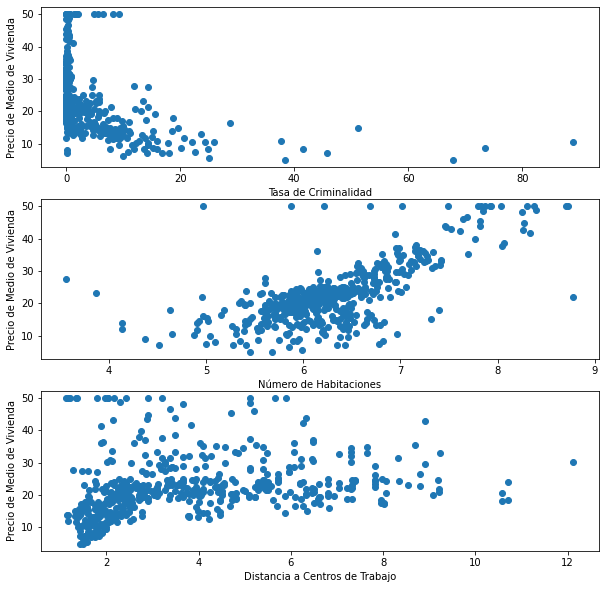

In [78]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
axs[0].scatter(x = X[:, 0], y = y)
axs[1].scatter(x = X[:, 1], y = y)
axs[2].scatter(x = X[:, 2], y = y)

axs[0].set_xlabel('Tasa de Criminalidad')
axs[1].set_xlabel('Número de Habitaciones')
axs[2].set_xlabel('Distancia a Centros de Trabajo')

axs[0].set_ylabel('Precio de Medio de Vivienda')
axs[1].set_ylabel('Precio de Medio de Vivienda')
axs[2].set_ylabel('Precio de Medio de Vivienda')

plt.show()

Del gráfico anterior se puede observar que los precios de vivienda tienen una relación lineal clara con el número de habitaciones de las viviendas. De esta forma, un mayor número de habitaciones disponibles en la vivienda trae consigo un mayor valor. 

De manera similar se encuentra que la relación entre el precio de vivienda y la tasa de criminalidad es aproximadamente lineal. Es importante resaltar que las zonas que tienen tasa de criminalidad cercana a cero, tienen todos los rangos de precios. 

Finalmente, se puede observar que la relación entre la distancia a los centros de trabajo y el precio de la vivienda no parece ser lineal sino mas bien logarítimica. Por esta razón, se realiza nuevamente el gráfico pero con esta variable transformada.

In [85]:
X[:, 2] = np.log(X[:, 2])

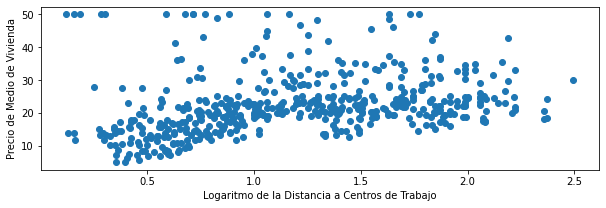

In [88]:
fig = plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 2], y = y)
plt.xlabel('Logaritmo de la Distancia a Centros de Trabajo')
plt.ylabel('Precio de Medio de Vivienda')
plt.show()

Con base a lo anterior, se plantea el siguiente modelo de regresión para la predicción de precios de vivienda. 
$$precio_i = \beta_0 + \beta_1 CRIM_i + \beta_2 RM_i + \beta_3 log(DIS_i) + \varepsilon_i$$

donde $precio_i$ es el precio de la $i$-ésima vivienda en Boston, $CRIM_i$ es la tasa de criminalidad per-cátipa al rededor de esta vivienda, $RM_i$ es la cantidad de habitaciones con la que cuenta la vivienda, y $log(DIS_i)$ es el logaritmo de la distancia entre la vivienda y los principales centros de trabajo de Boston. $\varepsilon_i$ es el término de perturbación.

Del total de la muestra se tomará el 80% de las observaciones al azar para utilizarlas como base de entrenamiento. El 20% restante será utilizado como base de prueba para determinar la capacidad predictiva del modelo. 


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A continuación utilizaremos la clase **LinearRegression** que se construyó anteriormente. Al instanciar la clase con los datos de entrenamiento, se estimará el modelo de regresión determinando los coeficientes para cada una de las variables escogidas.

In [91]:
model = LinearRegression(X_train, y_train)
model.coefficients

array([-3.11861816e+01, -2.60356240e-01,  8.69533535e+00,  3.01698822e-03])

Lo anterior indica que el modelo estimado para realizar la predicción de los precios de vivienda corresponde a

$$\widehat{precio}_i = -31.18 + -0.26 CRIM_i + 8.69 RM_i + 0.00301 log(DIS_i)$$

A continuación, se utilizará este modelo para predecir el precio de las viviendas que están en la base de prueba. Posteriormente se realizará un análisis de la predicción para conocer el desempeño del modelo.

In [92]:
y_hat = model.predict(X_test)

El siguiente gráfico presenta un diagrama de dispersión entre los verdaderos precios de vivienda para las unidades de prueba, y la predicción del modelo. Entre más cerca estén los puntos a la línea negra, mejor es la calidad de la predicción, pues se parecen más al dato de verdad. 

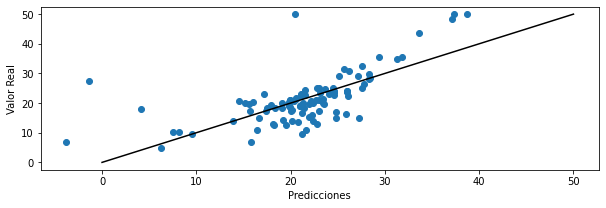

In [99]:
fig = plt.figure(figsize=(10,3))
plt.scatter(x = y_hat, y = y_test)

plt.plot((0, 50), (0, 50), color = 'k')


plt.xlabel('Predicciones')
plt.ylabel('Valor Real')
plt.show()

Se puede observar que el modelo logra capturar el fenómeno y es capaz de predecir relativamente bien los precios de vivienda de la mayoría de las unidades. Sin embargo, debido a su forma funcional, el modelo es capaz de hacer predicciones de precio negativa, exhibiendo así una debilidad importante. 

A continuación, se resume el resultado del modelo utilizando el error cuadrático medio (MSE). Esta cantidad viene dada por

$$MSE = \frac{1}{N} \sum_{i = 1}^N (y_i - \hat{y}_i)^2.$$


In [102]:
def MSE(y_true, y_pred):
  N = y_true.shape[0]
  diff = (y_true - y_pred)**2
  ssr = diff.sum()
  return ssr/N

MSE(y_test, y_hat)

41.9968587725478


Con el MSE se puede determinar la variabilidad del modelo y determinar qué tan cercanas son sus predicciones a los valores de verdad. El MSE es útil para comparar diferentes modelos que quieran predecir la misma variable. De esta forma, si se tiene otro candidato de modelo cuyo MSE es inferior, se preferirá el segundo frente el aquí desarrollado.

## 5. Conclusiones

## 6. Referencias

Gujarati, D. N., & Porter, D. C. (1999). *Essentials of econometrics (Vol. 2)*. Singapore: Irwin/McGraw-Hill.